<br><br>
<p style="font-size:30px"> <b> Apprentice Chef Analysis Report </b> </p>

<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /> 
Jisung Jung <br> 
Masters of Business Analytics <br>
Machine Learning - DAT-5303 | FMsBA2 <br>
Hult International Business School <br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

# Introduction

Apprentice Chef operates the online platform and mobile app bringing a daily-prepared cooking meal delivered to the customer's door. The executives at the company requested to take on an analytics project to reveal how much revenue to expect from each customer within their 1st year of orders and to reveal which customers will subscribe to a wine cross-selling service.

# Analyzing the model results

<p>We implemented four log-transformed modeling techniques. Out of these 4 models, OLS got the highest testing score: 0.753. And the least square fitted line is explained by </p>
<p> <img src="./Estimated log revenue equation.png" align="left"> </p>
<p>R-Square (0.758) recognized at OLS results in statsmodels. 32 explanatory variables were less than 0.05 p-value and affected revenue rates. The result interprets that revenue is sensitive at playing time of meal prep instruction video and high contacts with customer service. A 1% increase in average video time is associated with a 0.51% change in revenue. And one increase in the number of times contacts with customer service larger than 10 is associated with a -0.22% change in revenue.</p>
<p>On that note, we can anticipate that customers tend to make meals manageable after watching the video for meal prep instruction explaining cooking directions and process. Therefore, providing amusing and appeticious video (ex. Tiktok clips) could help customers to attract to buy back and be less likely to churn. Also, the company should focus and increase more seamless communication channels with meaningful conversations with customers such as blogs, discussion boards, and online communities to minimize the number of contacts with customer service.</p>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /> 
<p> Out of five classification models, CART got the highest AUC score: 0.726. 10 explanatory variables contributed to the model accuracy. We recognized that the lengths of name, domain groups, revenue are contributed to the separation in cross-selling-success. </p>
<p> From the username fields in the excel dataset, 592 users do not record the last name. 292 users not recording the last name demonstrated 0 in cross-selling-success, were made up 47% (= 292 / 625) in the cross-selling failures. We could guess the reason from the customer journey. As we know, there is an optional step submitting a picture of the ID card to purchase alcohol which is allowing at least 21 years of age. Probably, 47% of people of total cross-selling failures are likely to either teenagers or inconvenient users in ID verification so that buying alcohol is denied accordingly. In this regard, we need to consider the ID verification process easy and facilitate ways of existing customers to enter their last name and submit a picture of ID card without any trouble. </p> 

# Conclusion

<p> In a pandemic era, everyone has difficulty heading out to a restaurant or grocery store, step into a bar to drink liquors. But people still love to eat great meals with wellness shots, so there must be popular demands on taking the meal kit delivery goods to cook an efficient and convenient way. With the data analysis and predictive model, we have to detect the consumer behaviors and make the business stay relevant to existing and potential customers. Like providing amusing and appeticious videos or rearranging the customer journey would grow revenue and increase business success. </p>

# Appendix

## I. OLS showed the highest testing score: 0.753

In [1]:
########################################
# checking model performances
########################################
import pandas as pd

# specifying the path and file name
file = "./model_results/linear_model_performance.xlsx"

# reading the file into Python
model_performance = pd.read_excel(file)


model_performance.sort_values(by = 'Testing',
                              ascending = False)

Final Model Model Type  Training  Testing  Train-Test Gap  Model Size  \
0         Yes        OLS     0.763    0.753           0.010        33.0   
2          No        ARD     0.761    0.752           0.009        24.0   
1          No      Lasso     0.672    0.676           0.004        21.0   
3          No        KNN     0.646    0.596           0.050         NaN   

                                               Model  
0  [('intercept', 1.89), ('log_TOTAL_MEALS_ORDERE...  
2  [('intercept', 1.87), ('log_TOTAL_MEALS_ORDERE...  
1  [('intercept', -3876.96), ('log_TOTAL_MEALS_OR...  
3                                                NaN

## II. The least square fitted line is explained by following coefficients

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression

# specifying the path and file name
file = "./datasets/apprenticechef_feature_rich.xlsx"

# reading the file into Python
apprenticechef = pd.read_excel(file)

# Rename and Declaring set of x-variables 
apprenticechef.rename(columns = {'log_REVENUE':'Log Revenue', 'log_TOTAL_MEALS_ORDERED':'Log Total number of meals ordered',
                                 'log_UNIQUE_MEALS_PURCH':'Log unique meal sets ordered', 'log_AVG_PREP_VID_TIME':'Log Average video playing time',
                                 'log_LARGEST_ORDER_SIZE':'Log Average number of meals ordered', 'MASTER_CLASSES_ATTENDED':'Attended a master cooking class',
                                 'CONTACTS_W_CUSTOMER_SERVICE':'Contacts with customer service', 'MEDIAN_MEAL_RATING':'Median rating of meal sets',
                                 'TOTAL_PHOTOS_VIEWED':'Total number of clicks on photos', 'have_CANCELLATIONS_AFTER_NOON':'Meals canceled After 12pm over 0 count',
                                 'have_PHOTOS_VIEWED':'Total number of clicks on photos over 0 count', 'thld_UNIQUE_MEALS_PURCH':'Unique meal sets ordered over 9',
                                 'thld_CONTACTS_W_CUSTOMER_SERVICE':'Contacts with customer service over 10', 'thld_AVG_CLICKS_PER_VISIT':'Average number of clicks per visit over 10',
                                 'thld_MASTER_CLASSES_ATTENDED':'Attended a master cooking class over 2', 'thld_MEDIAN_MEAL_RATING':'Median rating of meal sets over 4',
                                 'aol':'aol.com', 'gmail':'gmail.com', 'hotmail':'hotmail.com', 'live':'live.com',
                                 'me':'me.com', 'msn':'msn.com', 'passport':'passport.com', 'protonmail':'protonmail.com',
                                 'yahoo':'yahoo.com', 'junk':'junk domains', 'personal':'personal domains', 'professional':'professional domains',
                                 'unknown':'unknown gender'         
                                 }, inplace = True) 

# preparing explanatory variable data
x_variables = ['Log Total number of meals ordered', 'Log unique meal sets ordered', 'Contacts with customer service',
               'Log Average video playing time', 'Log Average number of meals ordered', 'Attended a master cooking class', 
               'Median rating of meal sets', 'Total number of clicks on photos', 'Meals canceled After 12pm over 0 count',
               'Total number of clicks on photos over 0 count', 'Unique meal sets ordered over 9', 'Contacts with customer service over 10',
               'Average number of clicks per visit over 10', 'Attended a master cooking class over 2', 'Median rating of meal sets over 4',
               'aol.com', 'gmail.com', 'hotmail.com', 'live.com', 'me.com', 'msn.com', 'passport.com', 'protonmail.com',
               'yahoo.com', 'junk domains', 'personal domains', 'professional domains', 'landline', 'mobile', 'female', 'male', 
               'unknown gender']

ols_data = apprenticechef[x_variables]
log_apprenticechef_target = apprenticechef.loc[ : , 'Log Revenue']

###############################################
## setting up more than one train-test split ##
###############################################

# In train-test split, random_state is set to 219 and test_size is set to 0.25

# OLS p-value x-dataset (log Y)
X_train_OLS, X_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
             ols_data,                    # x-variables
             log_apprenticechef_target,   # y-variable
             test_size = 0.25,
             random_state = 219)

# INSTANTIATING a model object
lr = LinearRegression()

# FITTING to the training data
lr_fit = lr.fit(X_train_OLS, y_train_OLS)

# PREDICTING on new data
lr_pred = lr_fit.predict(X_test_OLS)

# zipping each feature name to its coefficient
lr_model_values = zip(apprenticechef[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 1.89)
('Log Total number of meals ordered', 0.14)
('Log unique meal sets ordered', -0.17)
('Contacts with customer service', 0.02)
('Log Average video playing time', 0.51)
('Log Average number of meals ordered', -0.13)
('Attended a master cooking class', 0.03)
('Median rating of meal sets', 0.05)
('Total number of clicks on photos', 0.0)
('Meals canceled After 12pm over 0 count', -0.01)
('Total number of clicks on photos over 0 count', 0.01)
('Unique meal sets ordered over 9', 0.12)
('Contacts with customer service over 10', -0.22)
('Average number of clicks per visit over 10', -0.08)
('Attended a master cooking class over 2', -0.09)
('Median rating of meal sets over 4', -0.16)
('aol.com', 0.02)
('gmail.com', 0.0)
('hotmail.com', -0.01)
('live.com', 0.0)
('me.com', -0.02)
('msn.com', -0.0)
('passport.com', 0.01)
('protonmail.com', -0.01)
('yahoo.com', 0.02)
('junk domains', 0.0)
('personal domains', 0.0)
('professional domains', -0.0)
('landline', -0.0)
('mobile', 0.0)
('

## III. R-Square (0.758) could recognize at OLS results in statsmodels. 32 explanatory variables were less than 0.05 p-value and affected revenue rates.

In [3]:
import statsmodels.formula.api as smf                

# specifying the path and file name
file = "./datasets/apprenticechef_feature_rich.xlsx"

# reading the file into Python
apprenticechef = pd.read_excel(file)

# Rename x-variables 
apprenticechef.rename(columns = {'log_REVENUE':'Log_Revenue', 'log_TOTAL_MEALS_ORDERED':'Log_Total_number_of_meals_ordered',
                                 'log_UNIQUE_MEALS_PURCH':'Log_unique_meal_sets_ordered', 'log_AVG_PREP_VID_TIME':'Log_Average_video_playing_time',
                                 'log_LARGEST_ORDER_SIZE':'Log_Average_number_of_meals_ordered', 'MASTER_CLASSES_ATTENDED':'Attended_a_master_cooking_class',
                                 'CONTACTS_W_CUSTOMER_SERVICE':'Contacts_with_customer_service', 'MEDIAN_MEAL_RATING':'Median_rating_of_meal_sets',
                                 'TOTAL_PHOTOS_VIEWED':'Total_number_of_clicks_on_photos', 'have_CANCELLATIONS_AFTER_NOON':'Meals_canceled_After_12pm_over_0_count',
                                 'have_PHOTOS_VIEWED':'Total_number_of_clicks_on_photos_over_0_count', 'thld_UNIQUE_MEALS_PURCH':'Unique_meal_sets_ordered_over_9',
                                 'thld_CONTACTS_W_CUSTOMER_SERVICE':'Contacts_with_customer_service_over_10', 'thld_AVG_CLICKS_PER_VISIT':'Average_number_of_clicks_per_visit_over_10',
                                 'thld_MASTER_CLASSES_ATTENDED':'Attended_a_master_cooking_class_over_2', 'thld_MEDIAN_MEAL_RATING':'Median_rating_of_meal_sets_over_4',
                                 'aol':'email_aol', 'gmail':'email_gmail', 'hotmail':'email_hotmail', 'live':'email_live',
                                 'me':'email_me', 'msn':'email_msn', 'passport':'email_passport', 'protonmail':'email_protonmail',
                                 'yahoo':'email_yahoo', 'junk':'junk_domains', 'personal':'personal_domains', 'professional':'professional_domains',
                                 'unknown':'unknown_gender'         
                                 }, inplace = True) 

# building a OLS p-value x-dataset model

# Step 1: build a model
lm_best = smf.ols(formula =  """Log_Revenue ~ Log_Total_number_of_meals_ordered + Log_unique_meal_sets_ordered +
                                              Contacts_with_customer_service +  
                                              Log_Average_video_playing_time + Log_Average_number_of_meals_ordered + Attended_a_master_cooking_class + 
                                              Median_rating_of_meal_sets + Total_number_of_clicks_on_photos +                          
                                              Meals_canceled_After_12pm_over_0_count + Total_number_of_clicks_on_photos_over_0_count +  
                                              Unique_meal_sets_ordered_over_9 + Contacts_with_customer_service_over_10 + 
                                              Average_number_of_clicks_per_visit_over_10 + Attended_a_master_cooking_class_over_2 + Median_rating_of_meal_sets_over_4 + 
                                              email_aol + email_gmail + email_hotmail + email_live + email_me + email_msn + email_passport + email_protonmail +
                                              email_yahoo + junk_domains + personal_domains + professional_domains +
                                              landline + mobile + female + male + unknown_gender""",
                                              data = apprenticechef)

# Step 2: fit the model based on the data
results = lm_best.fit()

# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Log_Revenue   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     226.3
Date:                Thu, 28 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:08:18   Log-Likelihood:                 1652.6
No. Observations:                1946   AIC:                            -3249.
Df Residuals:                    1918   BIC:                            -3093.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

## IV. CART (named as Pruned Tree) got the highest AUC score: 0.726

In [4]:
########################################
# checking model performances
########################################
import pandas as pd

# specifying the path and file name
file = "./model_results/classification_model_performance.xlsx"

# reading the file into Python
model_performance = pd.read_excel(file)


model_performance.sort_values(by = 'AUC Score',
                              ascending = False)

Final Model     Model Name  AUC Score  Training Accuracy  Testing Accuracy  \
2         Yes    Pruned Tree      0.726              0.761             0.782   
3          No  Random Forest      0.704              0.812             0.789   
4          No            GBM      0.697              0.770             0.774   
0          No       Logistic      0.637              0.715             0.743   
1          No      KNN Class      0.619              0.761             0.729   

     Confusion Matrix  
2   (89, 67, 39, 292)  
3   (73, 83, 20, 311)  
4   (75, 81, 29, 302)  
0  (53, 103, 22, 309)  
1  (49, 107, 25, 306)

 ## V. 10 explanatory variables contributed to the model accuracy. 

<ipython-input-5-bc9315356482>:78: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


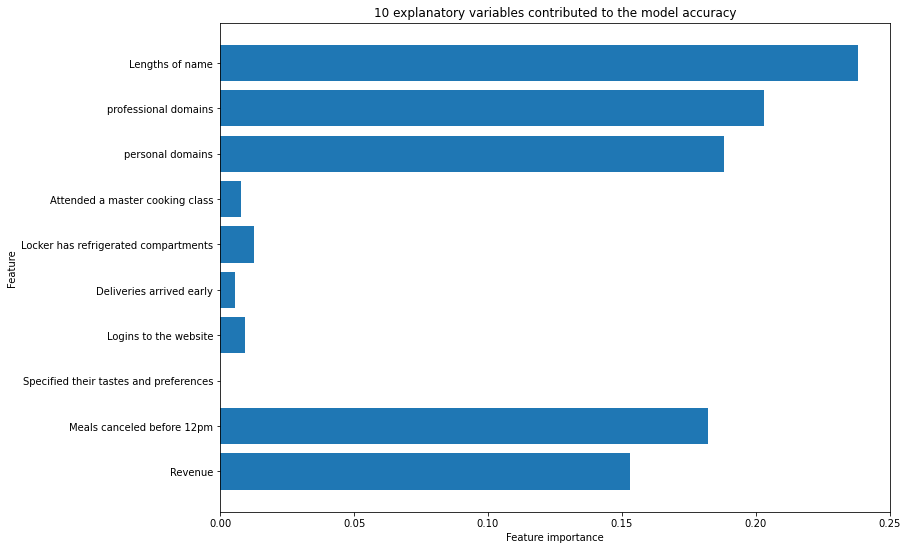

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split # train/test split
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO                             # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects

# specifying the path and file name
file = "./datasets/apprenticechef_feature_class.xlsx"

# reading the file into Python
apprenticechef = pd.read_excel(file)

# Rename x-variables 
apprenticechef.rename(columns = {'REVENUE':'Revenue', 'CANCELLATIONS_BEFORE_NOON':'Meals canceled before 12pm',
                                 'TASTES_AND_PREFERENCES':'Specified their tastes and preferences',
                                 'PC_LOGINS':'Logins to the website', 'EARLY_DELIVERIES':'Deliveries arrived early',
                                 'REFRIGERATED_LOCKER':'Locker has refrigerated compartments', 'MASTER_CLASSES_ATTENDED':'Attended a master cooking class',
                                 'personal':'personal domains', 'professional':'professional domains', 'number_of_names':'Lengths of name'      
                                 }, inplace = True) 

# preparing explanatory variable data
apprenticechef_data = apprenticechef.drop(['CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME'],
                                            axis = 1)

# preparing response variables
apprenticechef_target = apprenticechef.loc[ : , 'CROSS_SELL_SUCCESS']


# creating a dictionary to store candidate models
candidate_dict = {
    
  # significant variables only (set 2)
    
 'logit_sig_2'    : ['Revenue', 'Meals canceled before 12pm', 'Specified their tastes and preferences', 'Logins to the website', 
                     'Deliveries arrived early', 'Locker has refrigerated compartments', 'Attended a master cooking class',
                     'personal domains', 'professional domains', 'Lengths of name']
}

# train/test split with the full model
apprenticechef_data   =  apprenticechef.loc[ : , candidate_dict['logit_sig_2']]
apprenticechef_target =  apprenticechef.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(
            apprenticechef_data,
            apprenticechef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = apprenticechef_target)


########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = X_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.title("10 explanatory variables contributed to the model accuracy")
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('./analysis_images/Feature_Importance.png')

# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 5,
                                     min_samples_leaf = 17,
                                     criterion = 'entropy',
                                     random_state = 219)

# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(X_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(X_test)


# plotting feature importance
plot_feature_importances(pruned_tree_fit,
                         train  = X_train,
                         export = False)